## Reading jsons

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (7,6)
#plt.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json

## Read file names
path_to_json = '.'
times_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time.json')]
compact_time_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time_compact.json')]
mem_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_mem.json')]
triangulation_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_triangulation_info.json')]

## Read json of no compact files
data_to_append = []
for js in times_files:
    data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time = pd.concat(data_to_append, axis=1)
data_time = data_time.transpose()

## Read json of compact files
compact_data_to_append = []
for js in compact_time_files:
    compact_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time_compact = pd.concat(compact_data_to_append, axis=1)
data_time_compact = data_time_compact.transpose()

## Read json of memory files
mem_data_to_append = []
for js in mem_files:
    mem_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_mem = pd.concat(mem_data_to_append, axis=1)
data_mem = data_mem.transpose()

## Read json of triangulation files
triangulation_data_to_append = []
for js in triangulation_files:
    triangulation_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_triangulation = pd.concat(triangulation_data_to_append, axis=1)
data_triangulation = data_triangulation.transpose()

#Sort dataframe by n_vertices
data_time = data_time.sort_values(by=['n_vertices'])
data_time_compact = data_time_compact.sort_values(by=['n_vertices'])
data_mem = data_mem.sort_values(by=['num_vertices'])
data_triangulation = data_triangulation.sort_values(by=['n_points'])

# Remove last rows of dataframe
data_time = data_time.iloc[:15]
data_time_compact = data_time_compact.iloc[:15]
data_mem = data_mem.iloc[:15]
data_triangulation = data_triangulation.iloc[:15]


## Copy tables
data_time_table = data_time.copy(deep = True)
data_time_compact_table = data_time_compact.copy(deep = True)
data_mem_table = data_mem.copy(deep = True)
data_triangulation_table = data_triangulation.copy(deep = True)

#Geometric data as integer
data_time['n_vertices'] = data_time['n_vertices'].astype(int)
data_time['n_half_edges'] = data_time['n_half_edges'].astype(int)
data_time['n_faces'] = data_time['n_faces'].astype(int)
data_time['n_barrier_edge_tips'] = data_time['n_barrier_edge_tips'].astype(int)

data_time_compact['n_vertices'] = data_time_compact['n_vertices'].astype(int)
data_time_compact['n_half_edges'] = data_time_compact['n_half_edges'].astype(int)
data_time_compact['n_faces'] = data_time_compact['n_faces'].astype(int)
data_time_compact['n_barrier_edge_tips'] = data_time_compact['n_barrier_edge_tips'].astype(int)

## Convert byte to gb
data_mem['mem_polylla'] = data_mem['mem_gen_triangulation'] - data_mem['mem_polylla']
data_mem['mem_triangulation'] = data_mem['mem_triangulation']/1000000000
data_mem['mem_compact_triangulation'] = data_mem['mem_compact_triangulation']/1000000000
data_mem['mem_gen_triangulation'] = data_mem['mem_gen_triangulation']/1000000000
data_mem['mem_gen_compact_triangulation'] = data_mem['mem_gen_compact_triangulation']/1000000000
data_mem['mem_polylla'] = data_mem['mem_polylla']/1000000000
data_mem['mem_gen_polylla'] = data_mem['mem_gen_polylla']/1000000000


## Convert ms to minutes
data_time['time_to_generate_polygonal_mesh'] = data_time['time_to_generate_polygonal_mesh']/60000
data_time['time_triangulation_generation'] = data_time['time_triangulation_generation']/60000
data_time['time_to_label_max_edges'] = data_time['time_to_label_max_edges']/60000
data_time['time_to_label_frontier_edges'] = data_time['time_to_label_frontier_edges']/60000
data_time['time_to_label_seed_edges'] = data_time['time_to_label_seed_edges']/60000
data_time['time_to_label_total'] = data_time['time_to_label_total']/60000
data_time['time_to_traversal_and_repair'] = data_time['time_to_traversal_and_repair']/60000
data_time['time_to_traversal'] = data_time['time_to_traversal']/60000
data_time['time_to_repair'] = data_time['time_to_repair']/60000

data_time_compact['time_to_generate_polygonal_mesh'] = data_time_compact['time_to_generate_polygonal_mesh']/60000
data_time_compact['time_triangulation_generation'] = data_time_compact['time_triangulation_generation']/60000
data_time_compact['time_to_label_max_edges'] = data_time_compact['time_to_label_max_edges']/60000
data_time_compact['time_to_label_frontier_edges'] = data_time_compact['time_to_label_frontier_edges']/60000
data_time_compact['time_to_label_seed_edges'] = data_time_compact['time_to_label_seed_edges']/60000
data_time_compact['time_to_label_total'] = data_time_compact['time_to_label_total']/60000
data_time_compact['time_to_traversal_and_repair'] = data_time_compact['time_to_traversal_and_repair']/60000
data_time_compact['time_to_traversal'] = data_time_compact['time_to_traversal']/60000
data_time_compact['time_to_repair'] = data_time_compact['time_to_repair']/60000

data_triangulation['triangulation_time'] = data_triangulation['triangulation_time']/60000
data_triangulation['memory_usage'] = data_triangulation['memory_usage']/1000000000
data_triangulation['memory_peak'] = data_triangulation['memory_peak']/1000000000

# Time generation data structure and mesh

Text(0, 0.5, 'Time in minutes')

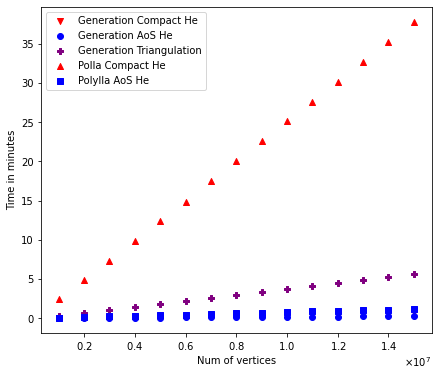

In [67]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="v", label='Generation Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="o",  label='Generation AoS He')
plt.scatter(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Generation Triangulation')

#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="red",marker="^", label='Polla Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="blue" ,marker="s",  label='Polylla AoS He')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")

In [75]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
'''
q = """SELECT data_time_table.n_vertices as "#Vertices", data_time_table.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_table.time_triangulation_generation as "Triangulation AoS", data_time_compact_table.time_to_generate_polygonal_mesh as "Polylla Compact", data_time_compact_table.time_triangulation_generation as "Triangulation Compact"
    FROM data_time_table, data_time_compact_table
    WHERE data_time_table.n_vertices = data_time_compact_table.n_vertices
    ORDER BY data_time_table.n_vertices
    LIMIT 10;"""
'''

q = """SELECT data_time.n_vertices as "#Vertices", data_triangulation.triangulation_time as "Delaunay Triangulation", data_time.time_triangulation_generation as "Triangulation AoS", data_time_compact.time_triangulation_generation as "Triangulation Compact", data_time.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_compact.time_to_generate_polygonal_mesh as "Polylla Compact"
    FROM data_time, data_time_compact, data_triangulation
    WHERE data_time.n_vertices = data_time_compact.n_vertices and data_time.n_vertices = data_triangulation.n_points
    ORDER BY data_time.n_vertices Desc
    LIMIT 10"""

pysqldf(q).round(2)

,#Vertices,Delaunay Triangulation,Triangulation AoS,Triangulation Compact,Polylla AoS,Polylla Compact
0,15000000,5.63,0.28,0.83,1.20,37.81
1,14000000,5.24,0.26,0.77,1.11,35.25
2,13000000,4.87,0.24,0.71,1.03,32.65
3,12000000,4.51,0.22,0.65,0.95,30.10
4,11000000,4.11,0.20,0.59,0.87,27.53
5,10000000,3.72,0.18,0.54,0.80,25.11
6,9000000,3.36,0.17,0.48,0.73,22.60
7,8000000,2.97,0.15,0.43,0.64,19.99
8,7000000,2.61,0.13,0.37,0.56,17.53
9,6000000,2.21,0.11,0.31,0.47,14.83


# Time by label phases

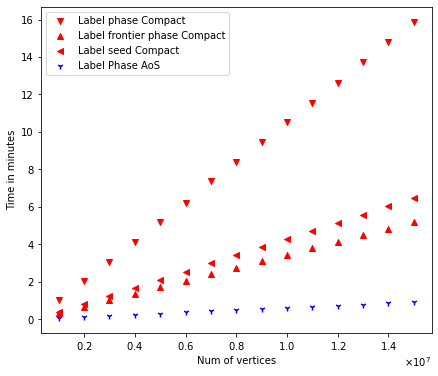

In [69]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Label frontier phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="<", label='Label seed Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="2",  label='Label frontier phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="3",  label='Label seed AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_label_phases.pdf', bbox_inches='tight', dpi=300)

# Time by polylla phases

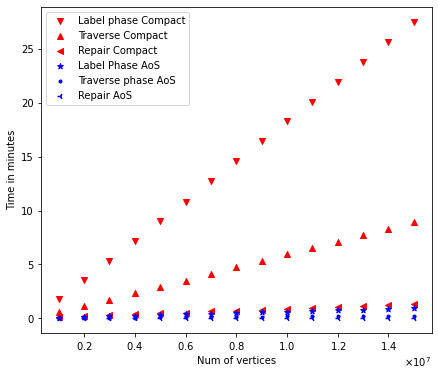

In [70]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'comp_time_polylla_phases.pdf', bbox_inches='tight', dpi=300)


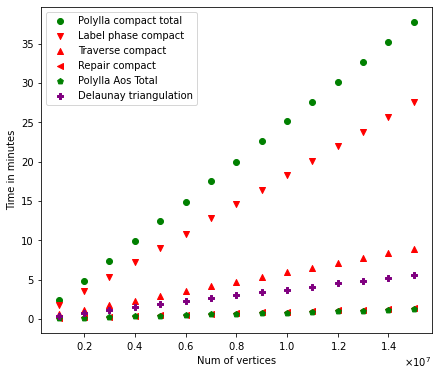

In [78]:
#data_time = data_time.iloc[:-1 , :]

plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="green",marker="o", label='Polylla compact total')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair compact')
plt.scatter(data_time_compact.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Delaunay triangulation')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_compact_polylla_phases.pdf', bbox_inches='tight', dpi=300)

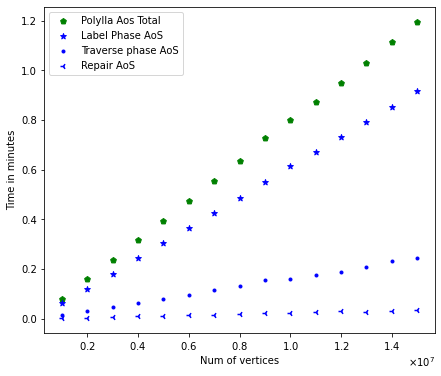

In [79]:

plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_polylla_AoS_phases.pdf', bbox_inches='tight', dpi=300)

# Memory comp general

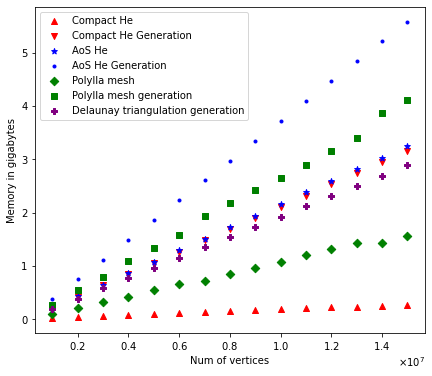

In [80]:

plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="v", label='Compact He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="*",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker=".",  label='AoS He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_polylla, c="green" ,marker="D",  label='Polylla mesh ')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_polylla, c="green" ,marker="s",  label='Polylla mesh generation')
plt.scatter(data_triangulation.n_points, data_triangulation.memory_peak, c="purple",marker="P", label='Delaunay triangulation generation')

plt.legend()
# https://stackoverflow.com/questions/25750170/show-decimal-places-and-scientific-notation-on-the-axis-of-a-matplotlib-plot
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Memory in gigabytes")
plt.savefig(r'comp_memory_all.pdf', bbox_inches='tight', dpi=300)



In [83]:
q = """SELECT data_mem.num_vertices as "#Vertices",  mem_compact_triangulation as "Triangulation compact", mem_gen_compact_triangulation as "Triangulation Compact Generation", mem_triangulation as "Triangulation AoS", mem_gen_triangulation as "Triangulation generation", mem_polylla as "Polylla mesh", mem_gen_polylla as "Polylla generation", memory_peak as "Delaunay Triangulation" 
FROM data_mem, data_triangulation
where data_mem.num_vertices = data_triangulation.n_points
ORDER BY num_vertices DESC
LIMIT 10"""

pysqldf(q)

,#Vertices,Triangulation compact,Triangulation Compact Generation,Triangulation AoS,Triangulation generation,Polylla mesh,Polylla generation,Delaunay Triangulation
0,15000000,0.273276,3.161713,3.239450,5.578820,1.555923,4.102477,2.882202
1,14000000,0.255066,2.950976,3.023472,5.206867,1.436519,3.860480,2.689776
2,13000000,0.236857,2.740276,2.807492,4.834911,1.434557,3.400354,2.497890
3,12000000,0.218648,2.529471,2.591512,4.462952,1.315156,3.147797,2.305337
4,11000000,0.200435,2.318757,2.375533,4.090999,1.195764,2.898025,2.112923
5,10000000,0.182226,2.108081,2.159558,3.719051,1.076371,2.656051,1.920918
6,9000000,0.164017,1.897277,1.943583,3.347105,0.956971,2.414081,1.729291
7,8000000,0.145762,1.686682,1.727604,2.975150,0.837571,2.172114,1.536721
8,7000000,0.127553,1.475424,1.511635,2.603216,0.718175,1.930129,1.345416
9,6000000,0.109344,1.264664,1.295660,2.231270,0.657498,1.573772,1.153208
